In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
input_data = pd.read_csv("/content/football_data.csv")

In [ ]:
input_data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [ ]:
input_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Dropping non numerical values 

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df = input_data.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club','Club Logo','Value','Wage','Preferred Foot','Work Rate',
                       'Body Type','Real Face','Release Clause', 'Joined', 'Loaned From','Contract Valid Until','Height',
                       'Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
                       'RDM','RWB','LB','LCB','CB','RCB','RB'])

In [ ]:
df = df.dropna()

In [ ]:
positions = df['Position']
df = df.drop(['Position'], axis = 1)

In [ ]:
def StandardScaler(col):
  s = col.std()
  mean = col.mean()
  col = col.apply(lambda x: (x - mean)/s)
  return col

In [ ]:
for col in df.columns:
  df[col] = StandardScaler(df[col])

In [ ]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04,1.814700e+04
mean,1.606205e-16,-9.285617e-15,9.718719e-16,2.471035e-14,2.590949e-16,7.127183e-14,-3.459714e-14,1.038396e-13,8.440925e-17,-1.478777e-15,-1.216583e-15,-3.366777e-15,-1.193751e-15,6.806027e-16,-5.882744e-15,-9.976804e-16,-5.352906e-15,1.609043e-15,-4.694160e-15,-4.510312e-15,-3.860208e-15,1.655613e-14,1.030251e-14,7.350402e-17,3.205263e-15,-1.178918e-15,-1.751078e-16,-5.179068e-15,-6.694699e-15,-2.294401e-15,-5.809843e-16,-4.559030e-15,2.070013e-14,-7.515403e-16,-2.925845e-15,8.866887e-16,-3.084313e-15,-3.305449e-15,4.118997e-16,5.868545e-16,5.975700e-17,2.874576e-16,-1.261379e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.728675e+00,-1.953216e+00,-2.929696e+00,-3.803488e+00,-3.177199e+00,-2.874461e-01,-2.948010e+00,-1.800263e+00,-1.162928e+00,-2.436168e+00,-2.230206e+00,-2.778820e+00,-3.517635e+00,-2.198940e+00,-2.716505e+00,-2.238327e+00,-2.280661e+00,-2.852906e+00,-3.198847e+00,-3.523892e+00,-3.598624e+00,-3.351713e+00,-4.532115e+00,-3.393042e+00,-3.102033e+00,-4.236986e+00,-3.222216e+00,-3.849329e+00,-2.290031e+00,-2.584054e+00,-2.111503e+00,-2.455763e+00,-3.068426e+00,-2.773104e+00,-4.865826e+00,-2.225380e+00,-2.109613e+00,-2.004247e+00,-8.823803e-01,-9.103410e-01,-9.229851e-01,-9.033059e-01,-8.749548e-01
25%,-8.658817e-01,-8.825057e-01,-6.153232e-01,-7.051327e-01,-5.167152e-01,-2.874461e-01,8.000968e-02,-4.779911e-01,-7.239946e-01,-6.391990e-01,-7.963268e-01,-4.775563e-01,-3.195024e-01,-7.296728e-01,-3.370920e-01,-7.162577e-01,-6.788338e-01,-6.343395e-01,-2.621911e-01,-5.098905e-01,-5.273242e-01,-5.756192e-01,-6.479981e-01,-5.634020e-01,-6.071875e-01,-5.998002e-01,-4.542908e-01,-5.830418e-01,-7.326524e-01,-6.838479e-01,-1.000256e+00,-6.124890e-01,-6.650209e-01,-6.079286e-01,-6.689722e-01,-8.686262e-01,-9.556053e-01,-1.017774e+00,-4.868690e-01,-4.963840e-01,-4.988482e-01,-4.924362e-01,-4.851459e-01
50%,-2.518028e-03,-2.593731e-02,-3.673000e-02,-5.284744e-02,1.355797e-01,-2.874461e-01,8.000968e-02,-4.779911e-01,-1.596522e-01,2.320587e-01,1.766627e-01,2.128228e-01,2.248606e-01,6.147091e-02,2.974183e-01,4.477696e-02,-1.067526e-01,2.139360e-01,2.771947e-01,1.598875e-01,1.551869e-01,1.691863e-01,1.785063e-02,1.440081e-01,2.050879e-01,7.688551e-02,1.747832e-01,1.339480e-01,2.017746e-01,1.798823e-01,2.559367e-01,2.579458e-01,1.125514e-01,2.888782e-02,1.179380e-01,2.871265e-01,3.368836e-01,2.975233e-01,-3.173642e-01,-3.189739e-01,-3.170752e-01,-3.163492e-01,-3.180850e-01
75%,8.697845e-01,6.164890e-01,6.865

## Agglomerative Clustering

In [ ]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(df)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    fig=plt.figure(figsize=(18, 10))
    plt.title("Dendrogram - Agglomerative Clustering")
    dendrogram(linkage_matrix, **kwargs)
    plt.show()

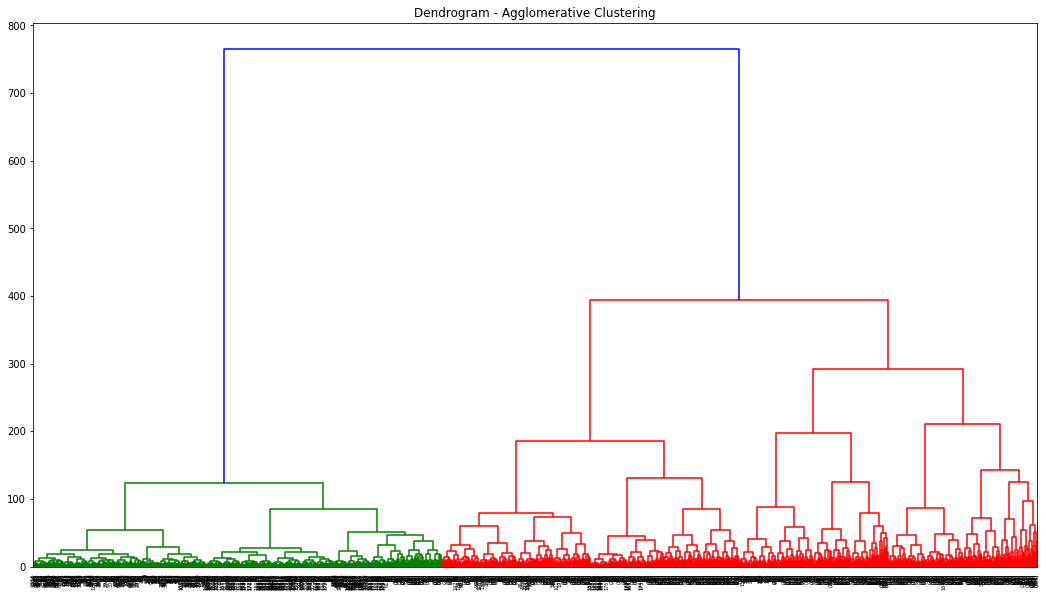

In [ ]:
plot_dendrogram(clustering, truncate_mode='level', p=10)

## Analysis of cluster formed by using bottom up approach



In [ ]:
def get_linkage_matrix(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix                        

In [ ]:
linkage_matrix = get_linkage_matrix(clustering)

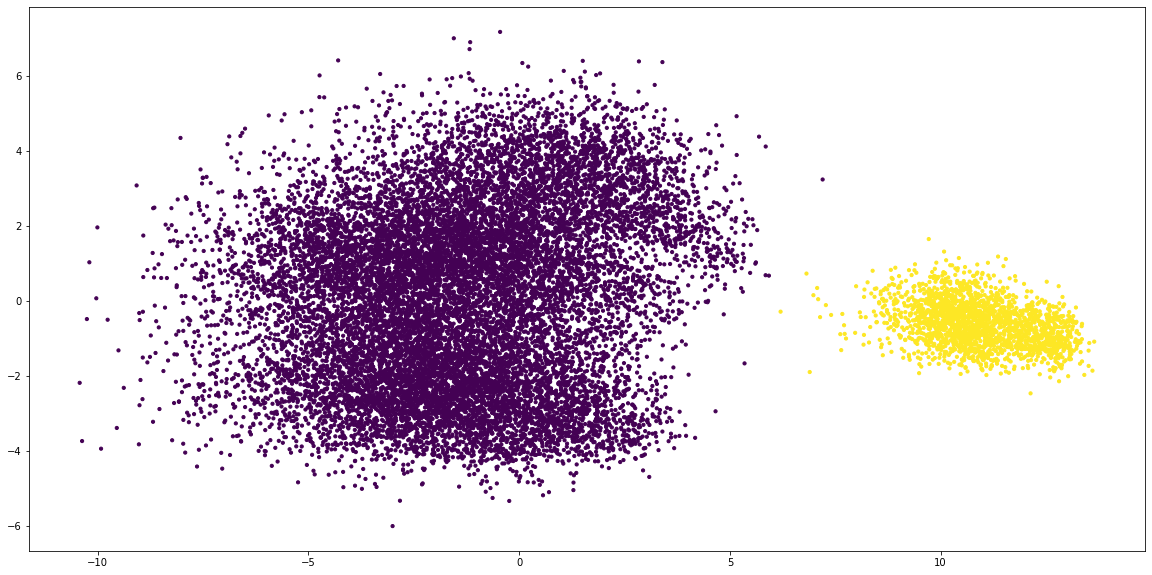

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clustering = AgglomerativeClustering(n_clusters=2).fit(df)
labels = clustering.labels_
footballPCA = pca.fit_transform(df)
PCA_dataset = pd.DataFrame(data =footballPCA , columns = ['c1', 'c2'] )
X=PCA_dataset.to_numpy()
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)

## Divisive hierarchical clustering method

In [ ]:
def calculate_dist(cluster1, cluster2):
  max_dist = 0
  dist = -2*np.dot(cluster1,cluster2.T) + np.sum(cluster2**2,axis=1) + np.sum(cluster1**2,axis=1)[:,np.newaxis]
  max_dist = np.max(dist)
  return max_dist

**function to Split cluster**

In [ ]:
id = 

def split(X,linkage):
  kmean = KMeans(n_clusters=2, random_state=0,max_iter = 1000).fit(X)
  [cluster1, cluster2] = kmean.cluster_centers_
  global id
  linkage.append(id)
  id = id + 1
  linkage.append(id)
  id = id + 1
  cluster1 = X[kmean.labels_ == 0]
  cluster2 = X[kmean.labels_ == 1]
  linkage.append(calculate_dist(cluster1, cluster2))
  linkage.append(len(X))
  return linkage, cluster1, cluster2, kmean

**Function to find meand distance between cluster centre and cluster datapoints**

In [ ]:
def clusterSSE(cluster,cluster_center):
  s = 0 
  for i in range(len(cluster)):
    s += euclidean_distances(cluster[i].reshape(1,-1), cluster_center.reshape(1,-1))
  return s/len(cluster)

**Main function to do divisive clustering using heapq as data structure**


1.   Recursively split the cluster with highest squared error
2.   Recusion stops when cluster has less than 100 elements



In [ ]:
import heapq
id = 0
kmean_objects = []
def linkage_creator(X,linkage_matrix, pq):
  while(pq):
    [dist, X] = heapq.heappop(pq)
    if(len(X) >= 100):
      linkage, cluster1, cluster2, kmean = split(X, [])
      kmean_objects.append(kmean)
      linkage_matrix.append(linkage)
      # print(len(cluster1), len(cluster2))
      [cluster_center1, cluster_center2] = kmean.cluster_centers_
      heapq.heappush(pq, (-1*clusterSSE(cluster2,cluster_center2), cluster2))
      heapq.heappush(pq, (-1*clusterSSE(cluster1,cluster_center1), cluster1))

  


**Calling above function to do divisive clustering**

In [ ]:
X = df.to_numpy()
linkage_matrix = []
pq = []
heapq.heappush(pq, (0,X))

In [ ]:
id = 0

linkage_creator(X, linkage_matrix,pq)

In [ ]:
linkage_matrix  = np.array(linkage_matrix)

**Dendogram of divisive clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

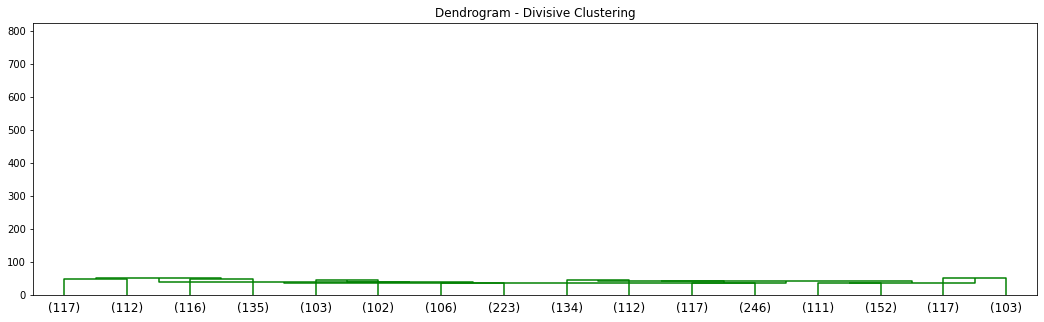

In [ ]:
fig=plt.figure(figsize=(18, 5))
plt.title("Dendrogram - Divisive Clustering")
dendrogram(linkage_matrix, orientation='top',truncate_mode='level', p=3)
plt.show()

## Analysis 

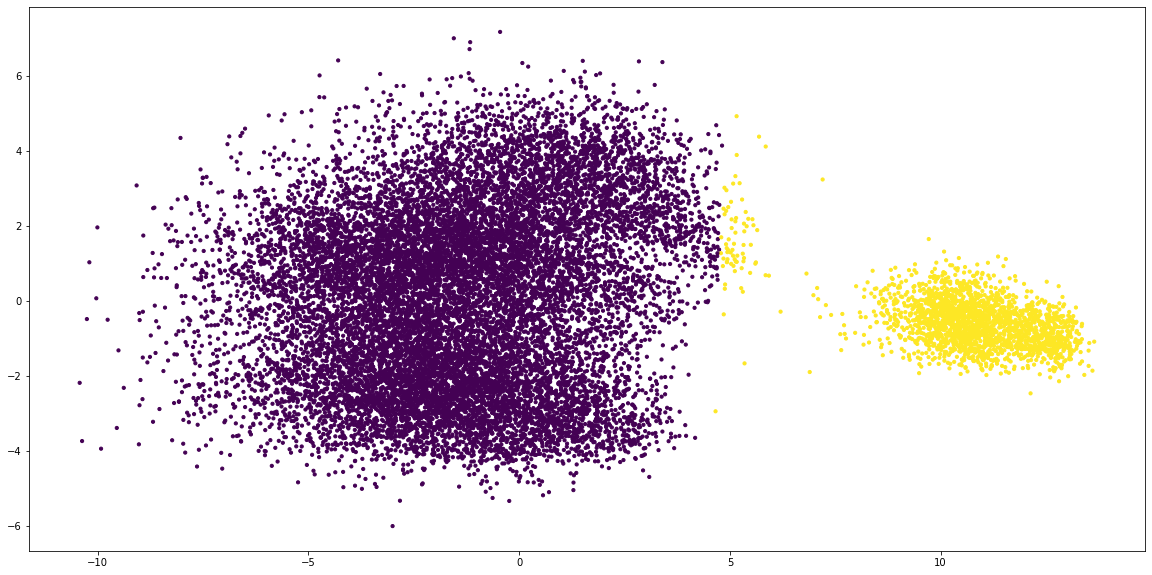

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
divisive_clustering = kmean_objects[0]
labels = divisive_clustering.labels_
footballPCA = pca.fit_transform(df)
PCA_dataset = pd.DataFrame(data =footballPCA , columns = ['c1', 'c2'] )
X=PCA_dataset.to_numpy()
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)